<a href="https://colab.research.google.com/github/PDeySarkar103/Dissertation_103/blob/main/Copy_of_Presentation_Advanced_Hiparcos_Star_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [6]:
from google.colab import files
uploaded = files.upload()

Saving hiparcos_test.csv to hiparcos_test.csv


In [7]:
#df0 = pd.read_csv("https://raw.githubusercontent.com/adamlamee/CODINGinK12/master/data/stars.csv")

In [8]:
df0=pd.read_csv('hiparcos_test.csv')

# EDA

In [9]:
df0.head()

Catalog  HIP Proxy        RAhms        DEdms  Vmag  VarFlag r_Vmag  \
0       H    1   NaN  00 00 00.22  +01 05 20.4  9.10      NaN      H   
1       H    2   NaN  00 00 00.91  -19 29 55.8  9.27      NaN      G   
2       H    3   NaN  00 00 01.20  +38 51 33.4  6.61      NaN      G   
3       H    4   NaN  00 00 02.01  -51 53 36.8  8.06      NaN      H   
4       H    5   NaN  00 00 02.39  -40 35 28.4  8.55      NaN      H   

      RAdeg      DEdeg  ... Survey  Chart  Notes        HD         BD  \
0  0.000912   1.089013  ...      S    NaN    NaN  224700.0  B+00 5077   
1  0.003797 -19.498837  ...    NaN    NaN    NaN  224690.0  B-20 6688   
2  0.005008  38.859286  ...      S    NaN    NaN  224699.0  B+38 5108   
3  0.008382 -51.893546  ...      S    NaN    NaN  224707.0        NaN   
4  0.009965 -40.591224  ...    NaN    NaN    NaN  224705.0        NaN   

          CoD         CPD  (V-I)red  SpType  r_SpType  
0         NaN         NaN      0.66      F5         S  
1         NaN         NaN      1.04     K3V         4  
2         NaN         NaN      0.00      B9         S  
3         NaN  P-52 12237      0.43     F0V         2  
4  C-41 15372  P-41  9991      0.95   G8III         2  

[5 rows x 78 columns]

In [10]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118218 entries, 0 to 118217
Data columns (total 78 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Catalog    118218 non-null  object 
 1   HIP        118218 non-null  int64  
 2   Proxy      10925 non-null   object 
 3   RAhms      118218 non-null  object 
 4   DEdms      118218 non-null  object 
 5   Vmag       118217 non-null  float64
 6   VarFlag    11562 non-null   float64
 7   r_Vmag     118217 non-null  object 
 8   RAdeg      117955 non-null  float64
 9   DEdeg      117955 non-null  float64
 10  AstroRef   13734 non-null   object 
 11  Plx        117955 non-null  float64
 12  pmRA       117955 non-null  float64
 13  pmDE       117955 non-null  float64
 14  e_RAdeg    117955 non-null  float64
 15  e_DEdeg    117955 non-null  float64
 16  e_Plx      117955 non-null  float64
 17  e_pmRA     117955 non-null  float64
 18  e_pmDE     117955 non-null  float64
 19  DE:RA      117955 non-n

# Visualizing the Data from Astronomical perspective

## Positions of stars in the sky

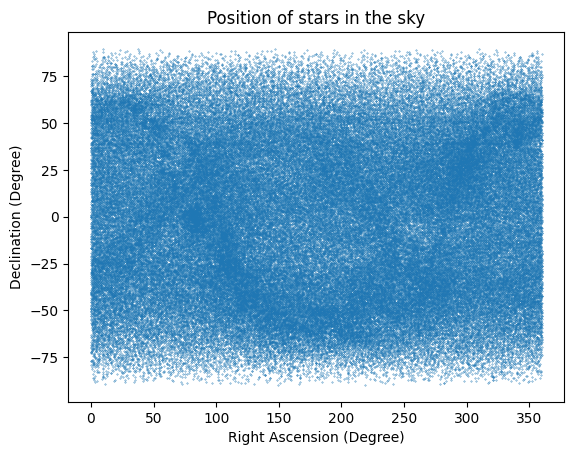

In [11]:
plt.plot(df0["RAdeg"], df0["DEdeg"], 'o', markersize = 0.3)
plt.xlabel("Right Ascension (Degree)")
plt.ylabel("Declination (Degree)")
plt.title ("Position of stars in the sky")
plt.show()

## Distances in Astronomy

In [12]:
d=1/df0['Plx']

In [13]:
d.describe()

count    1.179550e+05
mean              inf
std               NaN
min     -1.000000e+02
25%      1.067236e-01
50%      2.004008e-01
75%      3.584229e-01
max               inf
Name: Plx, dtype: float64

We need a few corrections, specially for mean and std

In [14]:
hipp_df_par_corrected = df0[df0["Plx"].notna()] #Taking care of the NaN values in parallaxes
#Making sure parallaxes are positive and not too close to zero
hipp_df_par_corrected = hipp_df_par_corrected[hipp_df_par_corrected.Plx > 0.1]
hipp_df_par_corrected["d"] = 1/hipp_df_par_corrected["Plx"]
hipp_df_par_corrected["d"].describe()

count    113278.000000
mean          0.351714
std           0.596814
min           0.001295
25%           0.115473
50%           0.207900
75%           0.364964
max           9.090909
Name: d, dtype: float64

## HR Diagram

In [15]:
hipp_df_par_corrected["Vmag"].isna().sum()

0

In [16]:
hipp_df_par_corrected["B-V"].isna().sum()

883

This means B-V column has null values. So, they too must be corrected

In [17]:
hipp_df_color_corrected = hipp_df_par_corrected[hipp_df_par_corrected["B-V"].notna()]

In [18]:
hipp_df_color_corrected

Catalog     HIP Proxy        RAhms        DEdms  Vmag  VarFlag r_Vmag  \
0            H       1   NaN  00 00 00.22  +01 05 20.4  9.10      NaN      H   
1            H       2   NaN  00 00 00.91  -19 29 55.8  9.27      NaN      G   
2            H       3   NaN  00 00 01.20  +38 51 33.4  6.61      NaN      G   
3            H       4   NaN  00 00 02.01  -51 53 36.8  8.06      NaN      H   
4            H       5   NaN  00 00 02.39  -40 35 28.4  8.55      NaN      H   
...        ...     ...   ...          ...          ...   ...      ...    ...   
118213       H  118318   NaN  23 59 51.30  +11 40 25.4  6.99      1.0      H   
118214       H  118319   NaN  23 59 53.74  -22 25 41.4  8.23      NaN      G   
118215       H  118320   NaN  23 59 54.25  +05 57 23.9  7.59      NaN      H   
118216       H  118321   NaN  23 59 54.78  -64 22 21.3  9.20      NaN      G   
118217       H  118322   NaN  23 59 54.91  -65 34 37.5  4.49      NaN      H   

             RAdeg      DEdeg  ... Chart  Notes        HD         BD  \
0         0.000912   1.089013  ...   NaN    NaN  224700.0  B+00 5077   
1         0.003797 -19.498837  ...   NaN    NaN  224690.0  B-20 6688   
2         0.005008  38.859286  ...   NaN    NaN  224699.0  B+38 5108   
3         0.008382 -51.893546  ...   NaN    NaN  224707.0        NaN   
4         0.009965 -40.591224  ...   NaN    NaN  224705.0        NaN   
...            ...        ...  ...   ...    ...       ...        ...   
118213  359.963744  11.673709  ...   NaN    NaN  224673.0  B+10 5018   
118214  359.973913 -22.428180  ...   NaN    NaN  224693.0        NaN   
118215  359.976057   5.956638  ...   NaN    NaN  224689.0  B+05 5245   
118216  359.978239 -64.372572  ...   NaN    NaN  224685.0        NaN   
118217  359.978792 -65.577078  ...   NaN    NaN  224686.0        NaN   

               CoD         CPD  (V-I)red  SpType  r_SpType         d  
0              NaN         NaN      0.66      F5         S  0.282486  
1              NaN         NaN      1.04     K3V         4  0.045662  
2              NaN         NaN      0.00      B9         S  0.355872  
3              NaN  P-52 12237      0.43     F0V         2  0.129032  
4       C-41 15372  P-41  9991      0.95   G8III         2  0.348432  
...            ...         ...       ...     ...       ...       ...  
118213         NaN         NaN      1.56      K2         S  0.520833  
118214  C-23 18108  P-23  8366      0.70     G2V         4  0.094073  
118215         NaN         NaN      0.98      K0         S  0.200000  
118216  C-65  2958  P-65  4188      0.75     G5V         1  0.052029  
118217         NaN  P-66  3819     -0.04    B9IV         X  0.114811  

[112395 rows x 79 columns]

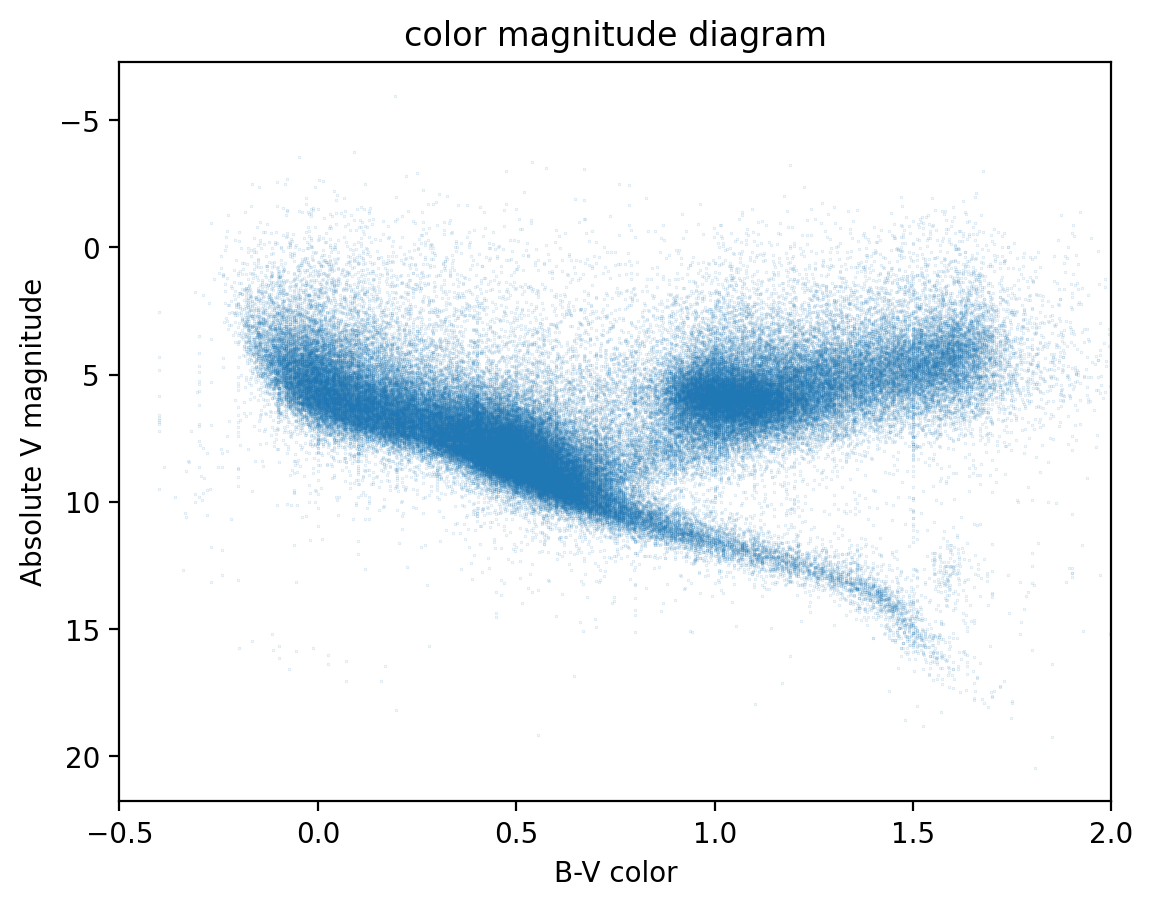

In [19]:
distance = hipp_df_color_corrected["d"] * 1000 #Obtaining the distance in parsecs
distance_modulus = 5 * (np.log10(distance / 10) - 1) #Calculate the distance modulus
abs_v_mag = hipp_df_color_corrected["Vmag"] - distance_modulus #Get the absolute V magnitude of the sources
#plt.figure(figsize=(4,4),dpi=300)
plt.figure(dpi=200)
plt.xlim(-0.5,2)
plt.plot(hipp_df_color_corrected["B-V"], abs_v_mag, marker='.', linestyle='none', alpha=0.3, markersize = 0.3)
plt.gca().invert_yaxis()
plt.xlabel("B-V color")
plt.ylabel("Absolute V magnitude")
plt.title("color magnitude diagram")
plt.show()


To obtain the H-R diagram, we will use the Ballesteros formula(Surfed Kaggle and Scipython documentation to get this. Did not get this in *Kuttner*

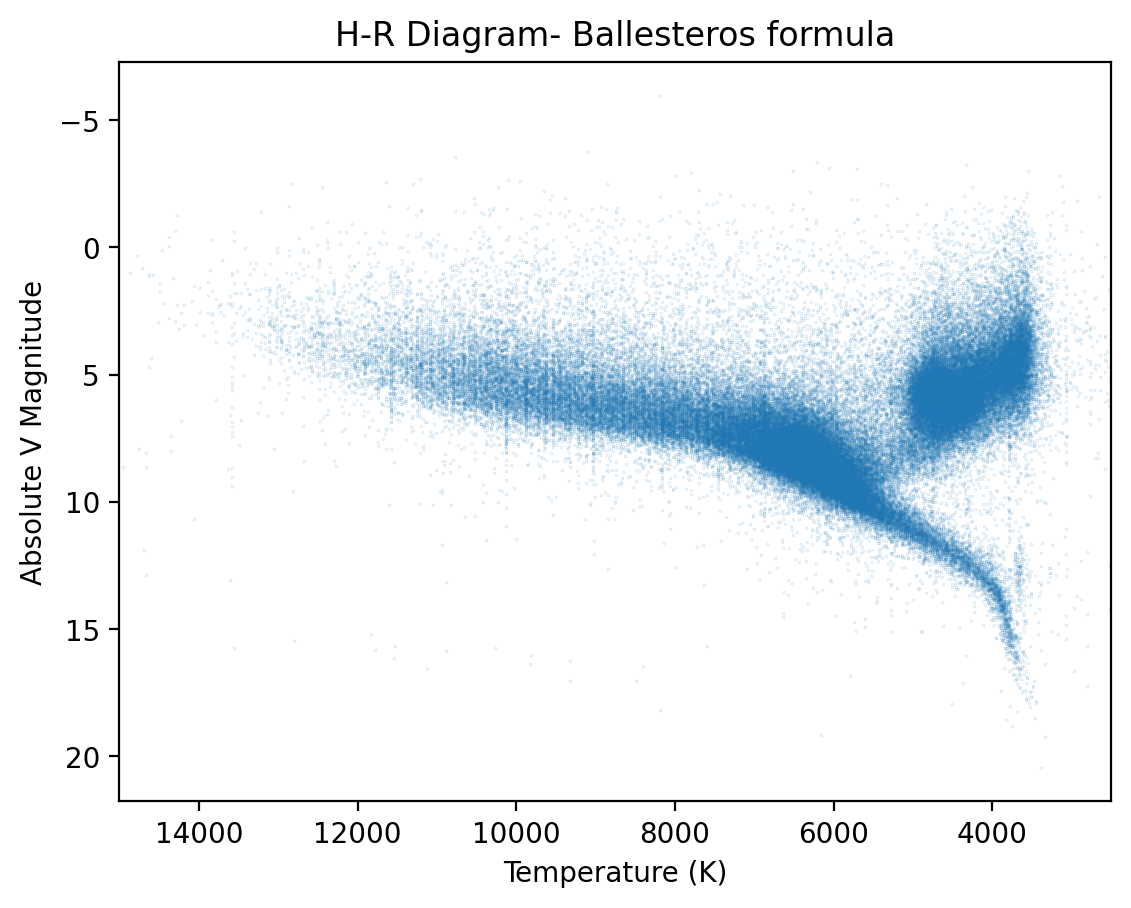

In [20]:
temperature = 4600 * (1/(0.92 * hipp_df_color_corrected['B-V'] + 1.7) + 1/(0.92 * hipp_df_color_corrected['B-V'] + 0.62)) #Ballesteros formula
#temperature2= 7000/(hipp_df_color_corrected['B-V']+0.47)
#plt.figure(figsize=(4,4),dpi=300)
plt.figure(dpi=200)
plt.plot(temperature, abs_v_mag, marker='.', linestyle='none', alpha=0.3, markersize = 0.3)
#plt.plot(temperature2, abs_v_mag, marker='.', linestyle='none', alpha=0.3, markersize = 0.3)
plt.xlim(15000,2500)
#plt.ylim()
#plt.ylim([])
plt.xlabel('Temperature (K)')
plt.ylabel("Absolute V Magnitude")
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.title("H-R Diagram- Ballesteros formula")
plt.show()

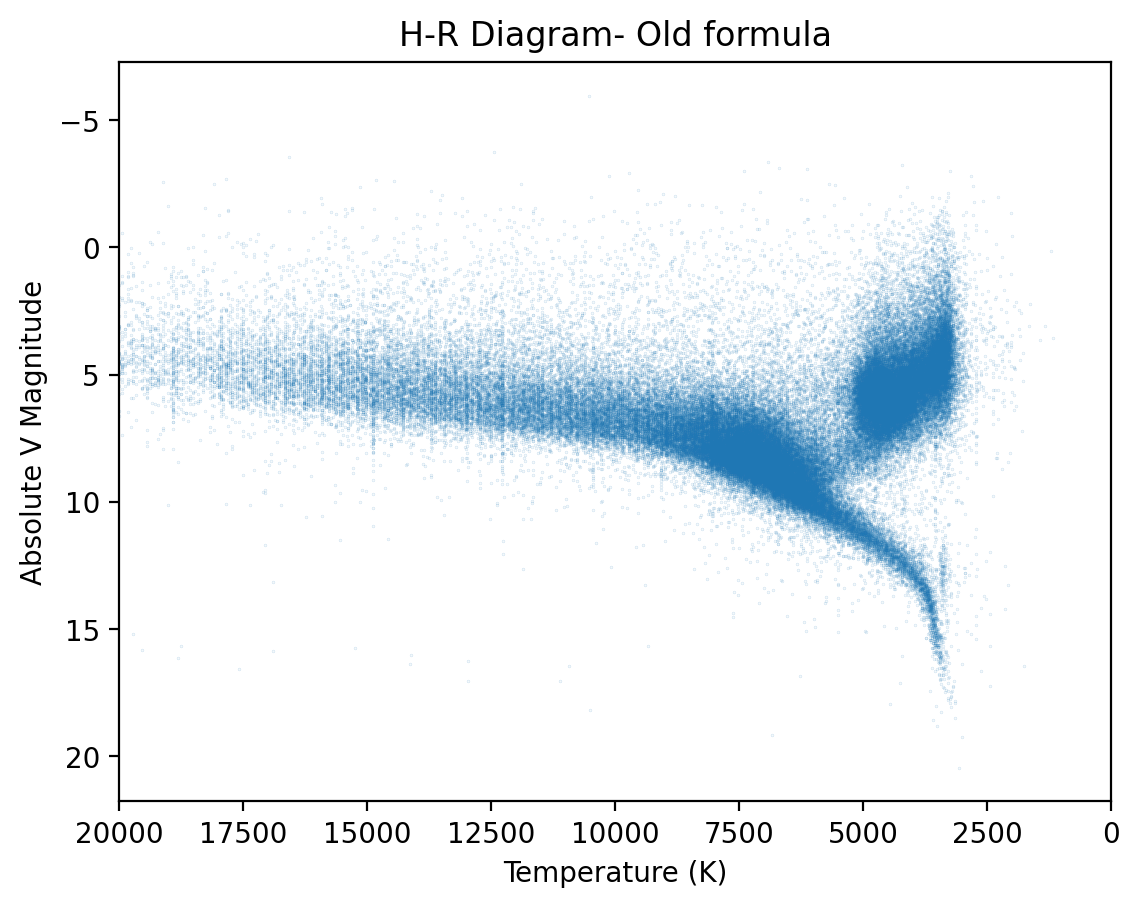

In [21]:
#temperature1 = 4600 * (1/(0.92 * hipp_df_color_corrected['B-V'] + 1.7) + 1/(0.92 * hipp_df_color_corrected['B-V'] + 0.62)) #Ballesteros formula
temperature2= 7000/(hipp_df_color_corrected['B-V']+0.47)
#plt.figure(figsize=(6,6),dpi=300)
plt.figure(dpi=200)
#plt.plot(temperature1, abs_v_mag, marker='.', linestyle='none', alpha=0.3, markersize = 0.3)
plt.plot(temperature2, abs_v_mag, marker='.', linestyle='none', alpha=0.3, markersize = 0.3)
plt.xlim(20000,0)
#plt.ylim()
#plt.ylim([])
plt.xlabel('Temperature (K)')
plt.ylabel("Absolute V Magnitude")
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.title("H-R Diagram- Old formula")
plt.show()

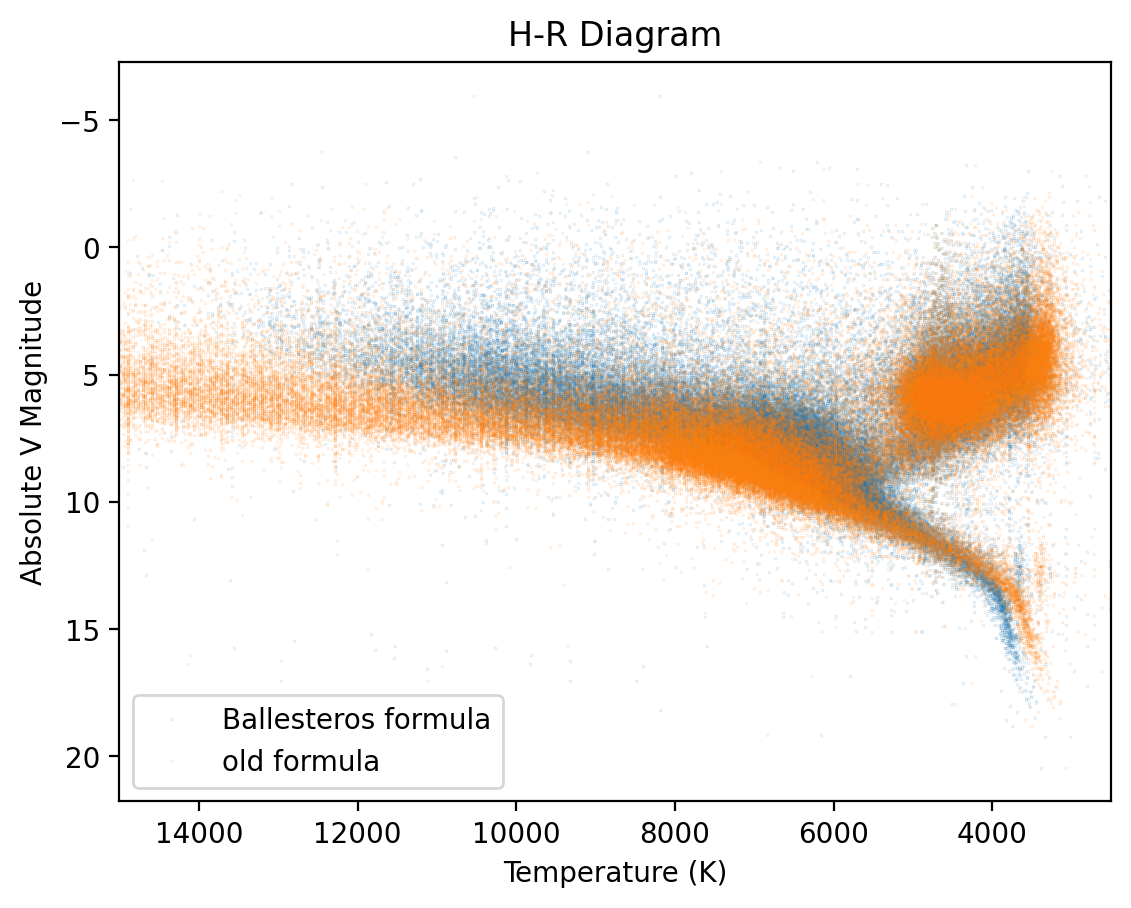

In [22]:
temperature1 = 4600 * (1/(0.92 * hipp_df_color_corrected['B-V'] + 1.7) + 1/(0.92 * hipp_df_color_corrected['B-V'] + 0.62)) #Ballesteros formula
temperature2= 7000/(hipp_df_color_corrected['B-V']+0.47)
#plt.figure(figsize=(6,6),dpi=300)
plt.figure(dpi=200)
#plt.subplot(211)
plt.plot(temperature1, abs_v_mag, marker='.', linestyle='none', alpha=0.3, markersize = 0.3,label='Ballesteros formula')
#plt.subplot(212)
plt.plot(temperature2, abs_v_mag, marker='.', linestyle='none', alpha=0.3, markersize = 0.3,label='old formula')
plt.xlim(15000,2500)
#plt.ylim()
#plt.ylim([])
plt.xlabel('Temperature (K)')
plt.ylabel("Absolute V Magnitude")
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.title("H-R Diagram")
plt.legend(loc='best')
plt.show()

# Analysis

## Feature selection

In [23]:
df = hipp_df_color_corrected[["Plx","Vmag","BTmag","VTmag","B-V","V-I","Hpmag","SpType"]].copy()
#df = hipp_df_color_corrected[["Plx","Vmag","VTmag","B-V","SpType"]].copy()
#df = hipp_df_color_corrected[["Plx","Vmag","BTmag","VTmag","B-V","V-I","SpType"]].copy()
df

Plx  Vmag   BTmag  VTmag    B-V   V-I   Hpmag SpType
0        3.54  9.10   9.643  9.130  0.482  0.55  9.2043     F5
1       21.90  9.27  10.519  9.378  0.999  1.04  9.4017    K3V
2        2.81  6.61   6.576  6.621 -0.019  0.00  6.6081     B9
3        7.75  8.06   8.471  8.092  0.370  0.43  8.1498    F0V
4        2.87  8.55   9.693  8.656  0.902  0.90  8.7077  G8III
...       ...   ...     ...    ...    ...   ...     ...    ...
118213   1.92  6.99   9.107  7.186  1.595  1.61  7.1043     K2
118214  10.63  8.23   9.019  8.295  0.639  0.70  8.3699    G2V
118215   5.00  7.59   8.868  7.704  0.999  0.98  7.7604     K0
118216  19.22  9.20  10.077  9.318  0.698  0.75  9.3312    G5V
118217   8.71  4.49   4.396  4.482 -0.075 -0.04  4.4758   B9IV

[112395 rows x 8 columns]

In [24]:
df['SpType'].tolist()

['F5',
 'K3V',
 'B9',
 'F0V',
 'G8III',
 'M0V:',
 'G0',
 'M6e-M8.5e Tc',
 'G5',
 'F6V',
 'A2',
 'K4III',
 'K0III',
 'K0',
 'K2',
 'F3V',
 nan,
 'K5',
 'G5',
 'G0',
 'K2',
 'G8/K0III/IV',
 'F2V',
 'G0V',
 'G3IV',
 'F7V',
 'G5V',
 'F3/F5V',
 'G8III',
 'A0',
 'K2',
 'B8',
 'F2',
 'F7.5IV-V',
 'G8/K0III/IV',
 'K0',
 'F0V',
 'G6V',
 'F3V',
 'A0',
 'F2',
 'G9III-IV',
 'K2',
 'K1III',
 'K3V',
 'K0/K1III',
 'F5',
 'G1IV',
 'K0',
 'A4V',
 'M:',
 'G2IV/V',
 'K0',
 'K2V',
 'G0',
 'F2IV',
 'K5',
 'G8III',
 'B9p SiEu',
 'K2III',
 nan,
 'F2V',
 'F5',
 'K0',
 'A0',
 nan,
 'G5',
 'G3/G5V',
 'K2',
 'K5',
 'K4III',
 'M0',
 'A0V',
 'K0',
 'F5',
 'G2V',
 'G5',
 'G5',
 'M0',
 'K0',
 'A2',
 'B9',
 'F5',
 'G8III',
 'K2',
 'F5IV/V',
 'K0',
 'G8III',
 'F8V',
 'G2',
 'F5V',
 'M0',
 'F6/F7V',
 'F5V',
 'C5p',
 'G0',
 'F5IV/V',
 'M1III',
 'F6V',
 'F7V',
 'F0',
 'G7II-III',
 'M2III',
 'K3II/III',
 'F0',
 'G5',
 'M2',
 'M1.5V:',
 'A0',
 'G0IV',
 'A2IV',
 'F3V',
 'G8III',
 'G0',
 'K0',
 'K1IIICNIV',
 'K2III',
 'K2III

In [25]:
c=df['SpType'].to_numpy()
c

array(['F5', 'K3V', 'B9', ..., 'K0', 'G5V', 'B9IV'], dtype=object)

In [26]:
#df= hipp_df_color_corrected.drop('SpType',axis=1)

In [27]:
df

Plx  Vmag   BTmag  VTmag    B-V   V-I   Hpmag SpType
0        3.54  9.10   9.643  9.130  0.482  0.55  9.2043     F5
1       21.90  9.27  10.519  9.378  0.999  1.04  9.4017    K3V
2        2.81  6.61   6.576  6.621 -0.019  0.00  6.6081     B9
3        7.75  8.06   8.471  8.092  0.370  0.43  8.1498    F0V
4        2.87  8.55   9.693  8.656  0.902  0.90  8.7077  G8III
...       ...   ...     ...    ...    ...   ...     ...    ...
118213   1.92  6.99   9.107  7.186  1.595  1.61  7.1043     K2
118214  10.63  8.23   9.019  8.295  0.639  0.70  8.3699    G2V
118215   5.00  7.59   8.868  7.704  0.999  0.98  7.7604     K0
118216  19.22  9.20  10.077  9.318  0.698  0.75  9.3312    G5V
118217   8.71  4.49   4.396  4.482 -0.075 -0.04  4.4758   B9IV

[112395 rows x 8 columns]

In [28]:
df.describe()

Plx           Vmag          BTmag          VTmag  \
count  112395.000000  112395.000000  110297.000000  110350.000000   
mean        7.532431       8.309200       9.129055       8.336346   
std        11.254455       1.275929       1.377428       1.216111   
min         0.110000      -1.440000      -0.417000      -0.608000   
25%         2.740000       7.610000       8.331000       7.669000   
50%         4.810000       8.400000       9.257000       8.456000   
75%         8.630000       9.080000      10.081000       9.124000   
max       772.330000      13.110000      14.114000      12.058000   

                 B-V            V-I          Hpmag  
count  112395.000000  112395.000000  112395.000000  
mean        0.700989       0.755293       8.413809  
std         0.482579       0.549955       1.285449  
min        -0.400000      -0.490000      -1.087600  
25%         0.349000       0.410000       7.706750  
50%         0.609000       0.680000       8.507100  
75%         1.069000       1.040000       9.200150  
max         5.460000       9.030000      13.491500

Viewing a Correlation matrix will be useful here

<Axes: >

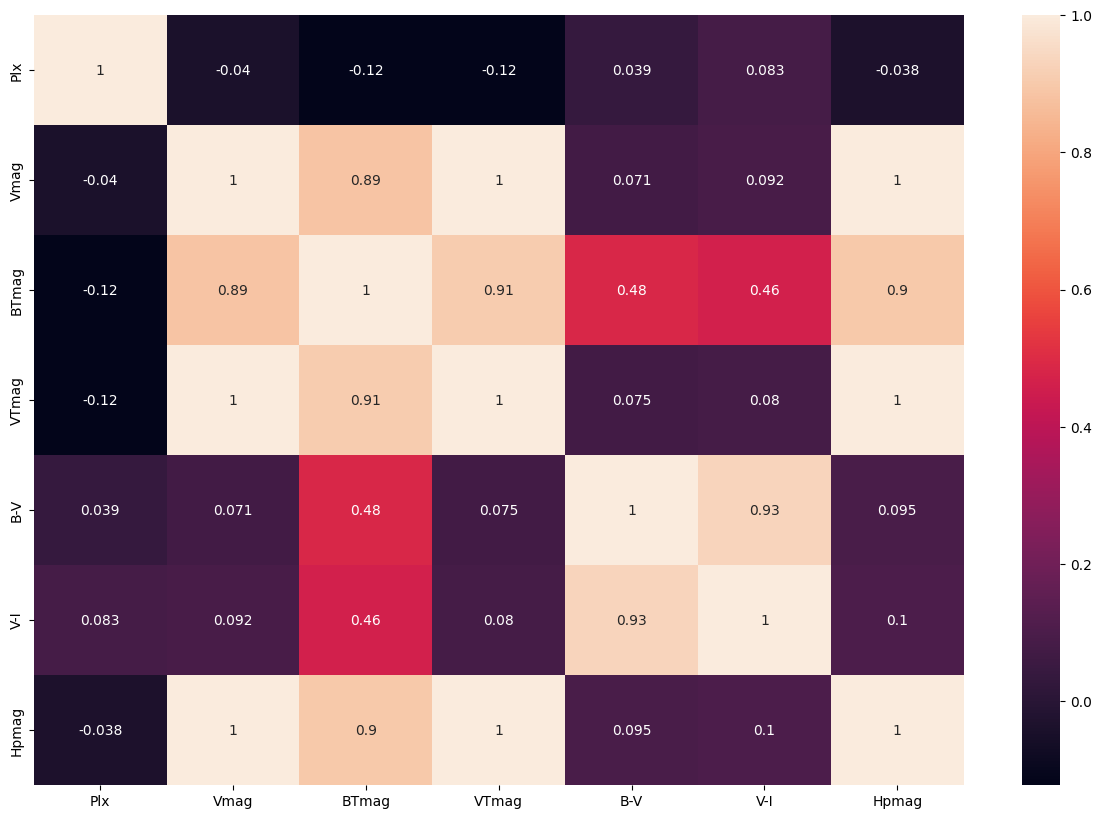

In [29]:
# Heatmap for expressing correlation

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)

In [30]:
df=df.dropna(axis=0)
df

Plx  Vmag   BTmag  VTmag    B-V   V-I   Hpmag SpType
0        3.54  9.10   9.643  9.130  0.482  0.55  9.2043     F5
1       21.90  9.27  10.519  9.378  0.999  1.04  9.4017    K3V
2        2.81  6.61   6.576  6.621 -0.019  0.00  6.6081     B9
3        7.75  8.06   8.471  8.092  0.370  0.43  8.1498    F0V
4        2.87  8.55   9.693  8.656  0.902  0.90  8.7077  G8III
...       ...   ...     ...    ...    ...   ...     ...    ...
118213   1.92  6.99   9.107  7.186  1.595  1.61  7.1043     K2
118214  10.63  8.23   9.019  8.295  0.639  0.70  8.3699    G2V
118215   5.00  7.59   8.868  7.704  0.999  0.98  7.7604     K0
118216  19.22  9.20  10.077  9.318  0.698  0.75  9.3312    G5V
118217   8.71  4.49   4.396  4.482 -0.075 -0.04  4.4758   B9IV

[108792 rows x 8 columns]

We see that, the spectral classes are further subdivided into 10 subgroups. So, they must be uniquely defined.

In [31]:
c=df['SpType'].to_numpy()
c

array(['F5', 'K3V', 'B9', ..., 'K0', 'G5V', 'B9IV'], dtype=object)

In [32]:
#c=df['SpType'].unique()
#c

Here, we are selecting only the first character of the spectral class for the broad classification

In [33]:
ST=np.array([])
for i in range(len(c)):
  ST=np.append(ST,c[i][0])
ST

array(['F', 'K', 'B', ..., 'K', 'G', 'B'], dtype='<U32')

There is an issue with the above code- It seems like some elements have been repeated... Troubleshooting is underway...

In [34]:
ST.size

108792

In [35]:
#specs=['O','B','A','F','G','K','M']
#sp=np.array([])
#ST_list=ST.tolist()
#for i in range(len(ST_list)):
#  for j in range(len(specs)):
#    if ST_list[i]==specs[j]:
#      sp=np.append(sp,ST_list[i])
#sp

In [36]:
df1=df.drop(['SpType'],axis=1)
df1

Plx  Vmag   BTmag  VTmag    B-V   V-I   Hpmag
0        3.54  9.10   9.643  9.130  0.482  0.55  9.2043
1       21.90  9.27  10.519  9.378  0.999  1.04  9.4017
2        2.81  6.61   6.576  6.621 -0.019  0.00  6.6081
3        7.75  8.06   8.471  8.092  0.370  0.43  8.1498
4        2.87  8.55   9.693  8.656  0.902  0.90  8.7077
...       ...   ...     ...    ...    ...   ...     ...
118213   1.92  6.99   9.107  7.186  1.595  1.61  7.1043
118214  10.63  8.23   9.019  8.295  0.639  0.70  8.3699
118215   5.00  7.59   8.868  7.704  0.999  0.98  7.7604
118216  19.22  9.20  10.077  9.318  0.698  0.75  9.3312
118217   8.71  4.49   4.396  4.482 -0.075 -0.04  4.4758

[108792 rows x 7 columns]

In [37]:
#df1=df1.to_numpy()
#df1

In [38]:
ST1=ST.tolist()
ST1

['F',
 'K',
 'B',
 'F',
 'G',
 'G',
 'M',
 'G',
 'F',
 'A',
 'K',
 'K',
 'K',
 'K',
 'F',
 'G',
 'G',
 'K',
 'G',
 'F',
 'G',
 'G',
 'F',
 'G',
 'F',
 'G',
 'A',
 'K',
 'B',
 'F',
 'F',
 'G',
 'K',
 'F',
 'G',
 'F',
 'A',
 'F',
 'G',
 'K',
 'K',
 'K',
 'K',
 'F',
 'G',
 'K',
 'A',
 'M',
 'G',
 'K',
 'K',
 'G',
 'F',
 'K',
 'G',
 'B',
 'K',
 'F',
 'F',
 'K',
 'A',
 'G',
 'G',
 'K',
 'K',
 'K',
 'M',
 'A',
 'K',
 'F',
 'G',
 'G',
 'G',
 'M',
 'K',
 'A',
 'B',
 'F',
 'G',
 'K',
 'F',
 'K',
 'G',
 'F',
 'G',
 'F',
 'M',
 'F',
 'F',
 'C',
 'G',
 'F',
 'M',
 'F',
 'F',
 'F',
 'G',
 'M',
 'K',
 'F',
 'G',
 'A',
 'G',
 'A',
 'F',
 'G',
 'G',
 'K',
 'K',
 'K',
 'K',
 'K',
 'F',
 'F',
 'G',
 'A',
 'F',
 'K',
 'A',
 'F',
 'F',
 'A',
 'G',
 'K',
 'B',
 'K',
 'B',
 'F',
 'K',
 'K',
 'K',
 'K',
 'B',
 'A',
 'F',
 'K',
 'F',
 'F',
 'F',
 'M',
 'A',
 'B',
 'G',
 'K',
 'A',
 'B',
 'K',
 'G',
 'A',
 'G',
 'G',
 'B',
 'R',
 'M',
 'F',
 'O',
 'A',
 'G',
 'G',
 'K',
 'A',
 'F',
 'G',
 'K',
 'M',
 'K',
 'B'

In [39]:
SType=ST1
df1.loc[:, "SpClass"] = ST1

In [40]:
df1

Plx  Vmag   BTmag  VTmag    B-V   V-I   Hpmag SpClass
0        3.54  9.10   9.643  9.130  0.482  0.55  9.2043       F
1       21.90  9.27  10.519  9.378  0.999  1.04  9.4017       K
2        2.81  6.61   6.576  6.621 -0.019  0.00  6.6081       B
3        7.75  8.06   8.471  8.092  0.370  0.43  8.1498       F
4        2.87  8.55   9.693  8.656  0.902  0.90  8.7077       G
...       ...   ...     ...    ...    ...   ...     ...     ...
118213   1.92  6.99   9.107  7.186  1.595  1.61  7.1043       K
118214  10.63  8.23   9.019  8.295  0.639  0.70  8.3699       G
118215   5.00  7.59   8.868  7.704  0.999  0.98  7.7604       K
118216  19.22  9.20  10.077  9.318  0.698  0.75  9.3312       G
118217   8.71  4.49   4.396  4.482 -0.075 -0.04  4.4758       B

[108792 rows x 8 columns]

Here, we have selected all those stars using careful investigation, which falls into our classification algorithm.

In [41]:
categories=df1['SpClass'].unique()
categories
#Take only those categories with at least 2500 entries
specs = categories[df1["SpClass"].value_counts(sort=False).values>150]
specs

array(['F', 'K', 'B', 'G', 'M', 'A', 'O'], dtype=object)

In [42]:
#categories=df['SpType'].unique()

# Take only those categories with at least 2500 entries
#specs = categories[df["SpType"].value_counts(sort=False).values>2500]
#specs

In [43]:
# Build the new dataset with only these spectral types
dfspec = df1[df1["SpClass"]==specs[0]]
for spec in specs[1:]:
    dfspec = dfspec.append(df1[df1["SpClass"]==spec])

df1 = dfspec
df1 #New dataset

Plx   Vmag   BTmag   VTmag    B-V   V-I    Hpmag SpClass
0        3.54   9.10   9.643   9.130  0.482  0.55   9.2043       F
3        7.75   8.06   8.471   8.092  0.370  0.43   8.1498       F
9       10.76   8.59   9.140   8.630  0.489  0.56   8.6994       F
15       6.15   8.15   8.642   8.187  0.425  0.49   8.2405       F
22      12.21   7.57   8.044   7.606  0.456  0.53   7.6626       F
...       ...    ...     ...     ...    ...   ...      ...     ...
114380   0.48   7.23   7.187   7.220 -0.026  0.00   7.2321       O
114583   2.04   8.69   9.426   8.836  0.630  0.70   8.8228       O
115322   1.54  10.80  11.624  10.802  0.750  0.79  10.9373       O
116125   2.57  10.94  11.564  11.016  0.728  0.78  11.0972       O
118008   0.86   8.72   9.597   8.833  0.681  0.74   8.8661       O

[108486 rows x 8 columns]

In [44]:
df1['SpClass'].unique()

array(['F', 'K', 'B', 'G', 'M', 'A', 'O'], dtype=object)

## Taking the Number of Counts for each class

In [45]:
df1['SpClass'].value_counts()

K    30163
F    24889
G    21975
A    18087
B     9420
M     3777
O      175
Name: SpClass, dtype: int64

<BarContainer object of 7 artists>

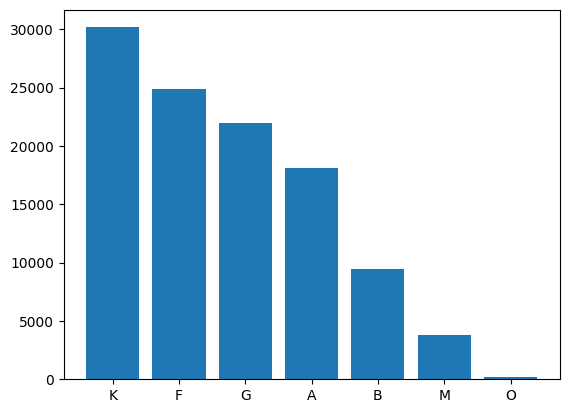

In [46]:
plt.bar(df1["SpClass"].value_counts().index, df1["SpClass"].value_counts())

In [47]:
df2=df1.drop(['SpClass'],axis=1)
df2

Plx   Vmag   BTmag   VTmag    B-V   V-I    Hpmag
0        3.54   9.10   9.643   9.130  0.482  0.55   9.2043
3        7.75   8.06   8.471   8.092  0.370  0.43   8.1498
9       10.76   8.59   9.140   8.630  0.489  0.56   8.6994
15       6.15   8.15   8.642   8.187  0.425  0.49   8.2405
22      12.21   7.57   8.044   7.606  0.456  0.53   7.6626
...       ...    ...     ...     ...    ...   ...      ...
114380   0.48   7.23   7.187   7.220 -0.026  0.00   7.2321
114583   2.04   8.69   9.426   8.836  0.630  0.70   8.8228
115322   1.54  10.80  11.624  10.802  0.750  0.79  10.9373
116125   2.57  10.94  11.564  11.016  0.728  0.78  11.0972
118008   0.86   8.72   9.597   8.833  0.681  0.74   8.8661

[108486 rows x 7 columns]

In [48]:
# Final selection
Xsc=df2
Y=df1["SpClass"]

In [49]:
Y

0         F
3         F
9         F
15        F
22        F
         ..
114380    O
114583    O
115322    O
116125    O
118008    O
Name: SpClass, Length: 108486, dtype: object

In [50]:
df1['SpClass'].unique()

array(['F', 'K', 'B', 'G', 'M', 'A', 'O'], dtype=object)

## Resampling the Imbalanced Data

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
Xsc_res, Y_res = sm.fit_resample(Xsc, Y)

## ML models

#### Encoding- For ML Methods

In [52]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Ysc_res=LE.fit_transform(Y_res)

In [53]:
Ysc_res

array([2, 2, 2, ..., 6, 6, 6])

In [54]:
#0=A
#1=B
#2=F
#3=G
#4=K
#5=M
#6=O

In [55]:
from sklearn.model_selection import train_test_split
Xsc_train, Xsc_test, ysc_train, ysc_test= train_test_split(Xsc_res,Ysc_res,test_size=0.25,random_state=210)

In [56]:
ysc_test

array([3, 6, 4, ..., 1, 1, 4])

#### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(Xsc_train,ysc_train)

y_predLR=model.predict(Xsc_test)

In [58]:
from sklearn.metrics import recall_score
LR_score=recall_score(ysc_test,y_predLR,average='weighted')
LR_score

0.7002803773727883

Text(158.22222222222223, 0.5, 'Prediction')

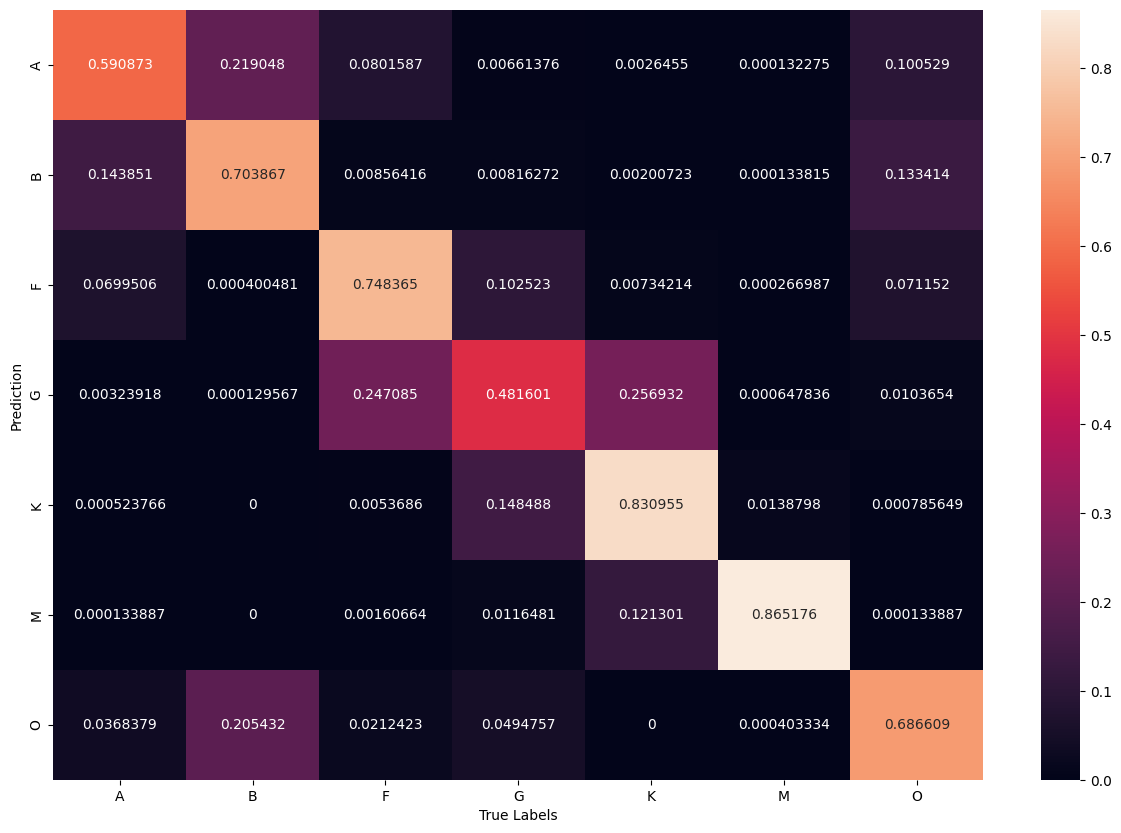

In [59]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(ysc_test,y_predLR,normalize='true')
plt.figure(figsize=(15,10))
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['A','B','F','G','K','M','O'],yticklabels=['A','B','F','G','K','M','O'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

#### Analysis of the result

In [60]:
np.unique(y_predLR)

array([0, 1, 2, 3, 4, 5, 6])

In [61]:
#Sc_LR=np.array([])
predictions_df = pd.DataFrame(y_predLR,columns=["Predictions"])
test_df = pd.concat([pd.DataFrame(ysc_test,columns=["Real Values"]), predictions_df],axis=1)
test_df

Real Values  Predictions
0                3            2
1                6            6
2                4            3
3                2            2
4                1            1
...            ...          ...
52781            5            5
52782            6            6
52783            1            1
52784            1            1
52785            4            3

[52786 rows x 2 columns]

<BarContainer object of 7 artists>

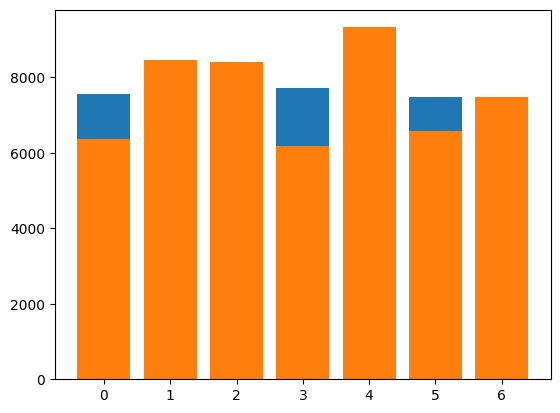

In [62]:
plt.bar(test_df["Real Values"].value_counts().index, test_df["Real Values"].value_counts())
plt.bar(test_df["Predictions"].value_counts().index, test_df["Predictions"].value_counts())

####Decision Tree

In [63]:
#from sklearn.preprocessing import LabelEncoder
#LE=LabelEncoder()
#Ysc=LE.fit_transform(Y)

In [64]:
#np.unique(Ysc)

In [65]:
#from sklearn.model_selection import train_test_split
#Xsc_train, Xsc_test, ysc_train, ysc_test= train_test_split(Xsc,Ysc,test_size=0.4,random_state=210)

In [66]:
# Training the ML model

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='entropy',random_state=30)
model.fit(Xsc_train,ysc_train)

y_predDT=model.predict(Xsc_test)

In [67]:
from sklearn.metrics import recall_score
dt_score=recall_score(ysc_test,y_predDT,average='weighted')
dt_score

0.802580229606335

Text(158.22222222222223, 0.5, 'Prediction')

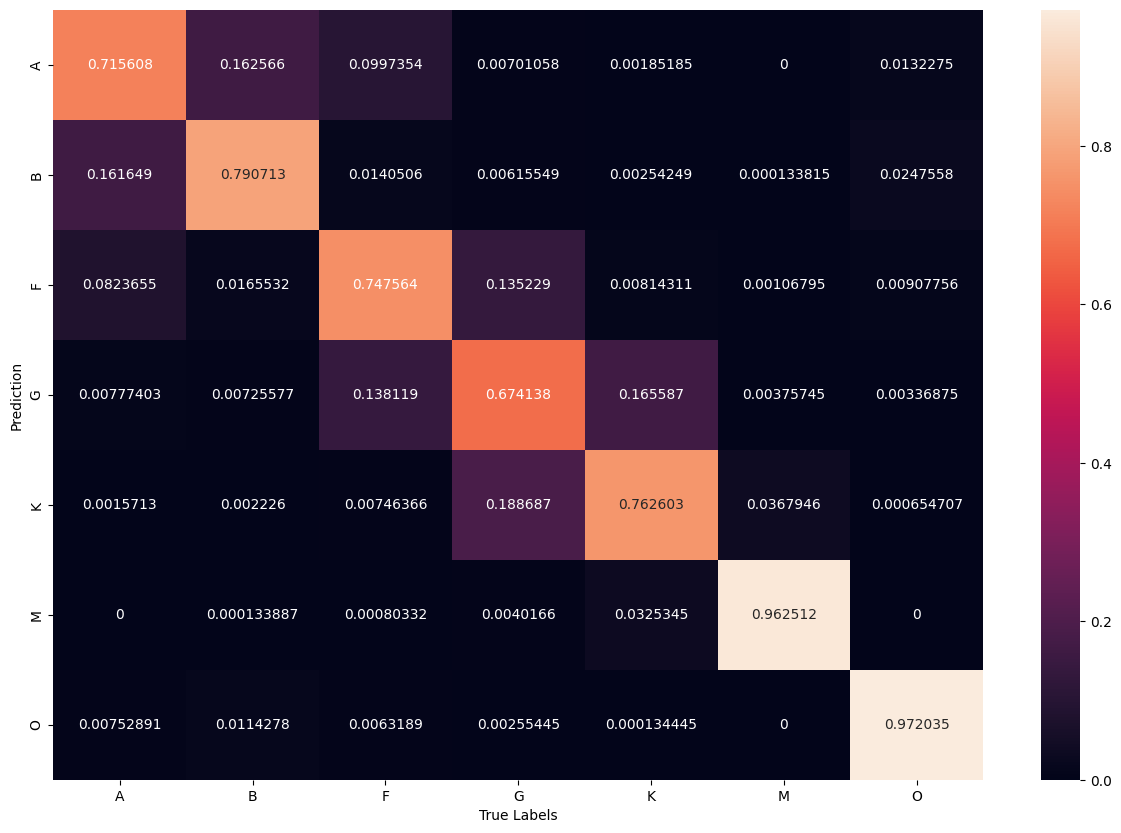

In [68]:
from sklearn.metrics import confusion_matrix

cm_DT=confusion_matrix(ysc_test,y_predDT,normalize='true')

plt.figure(figsize=(15,10))
#sns.heatmap(cm_ann,annot=True,fmt='g')
sns.heatmap(cm_DT,annot=True,fmt='g',xticklabels=['A','B','F','G','K','M','O'],yticklabels=['A','B','F','G','K','M','O'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [69]:
#Sc_LR=np.array([])
predictions_df_DT = pd.DataFrame(y_predDT,columns=["Predictions"])
test_df_DT = pd.concat([pd.DataFrame(ysc_test,columns=["Real Values"]), predictions_df_DT],axis=1)
test_df_DT

Real Values  Predictions
0                3            3
1                6            6
2                4            3
3                2            2
4                1            1
...            ...          ...
52781            5            5
52782            6            6
52783            1            1
52784            1            1
52785            4            4

[52786 rows x 2 columns]

<BarContainer object of 7 artists>

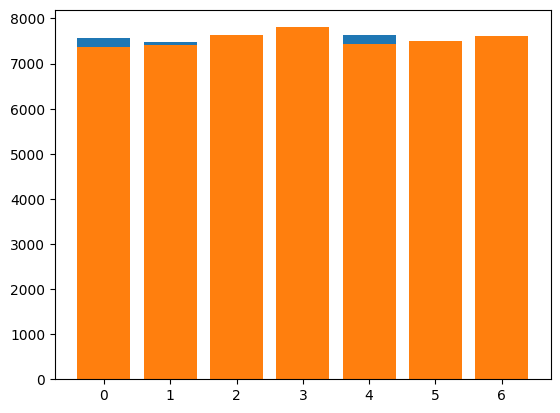

In [70]:
plt.bar(test_df_DT["Real Values"].value_counts().index, test_df_DT["Real Values"].value_counts())
plt.bar(test_df_DT["Predictions"].value_counts().index, test_df_DT["Predictions"].value_counts())

## ANN

### Encoding

In [71]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
l_encode=LabelEncoder()
l_encode.fit(Y_res)
Ysc_res=l_encode.transform(Y_res)
Ysc_res=to_categorical(Ysc_res)

In [72]:
Ysc_res

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### Splitting into Training and Testing

In [73]:
from sklearn.model_selection import train_test_split
Xsc_train, Xsc_test, ysc_train, ysc_test= train_test_split(Xsc_res,Ysc_res,test_size=0.25,random_state=210)

In [74]:
Xsc_train.shape,Xsc_test.shape,ysc_train.shape,ysc_test.shape

((158355, 7), (52786, 7), (158355, 7), (52786, 7))

### Developing a ANN model

In [75]:
import tensorflow as tf

In [76]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(32,input_dim=Xsc_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(18,activation='relu'),
    #tf.keras.layers.Dense(300,activation='relu'),
    #tf.keras.layers.Dense(100,activation='relu'),
    #tf.keras.layers.Dense(50,activation='relu'),
    #tf.keras.layers.Dense(17,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax'),
    ])

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 18)                594       
                                                                 
 dense_2 (Dense)             (None, 7)                 133       
                                                                 
Total params: 983 (3.84 KB)
Trainable params: 983 (3.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(Xsc_train,ysc_train,validation_data=(Xsc_test,ysc_test),epochs=40)
#model.fit(Xsc_train,ysc_train,validation_data=(Xsc_test,ysc_test),epochs=40,callbacks=EarlyStopping(monitor='val_loss'))
#model_loss_acc = pd.DataFrame(model.history.history)
#model_loss_acc[['loss', 'val_loss']].plot()
#model_loss_acc[['accuracy', 'val_accuracy']].plot()

Epoch 1/40
4949/4949 [==============================] - 23s 4ms/step - loss: 0.9981 - accuracy: 0.5943 - val_loss: 0.8770 - val_accuracy: 0.6481
Epoch 2/40
4949/4949 [==============================] - 18s 4ms/step - loss: 0.8167 - accuracy: 0.6720 - val_loss: 0.7586 - val_accuracy: 0.7027
Epoch 3/40
4949/4949 [==============================] - 19s 4ms/step - loss: 0.7666 - accuracy: 0.6953 - val_loss: 0.7388 - val_accuracy: 0.7083
Epoch 4/40
4949/4949 [==============================] - 18s 4ms/step - loss: 0.7421 - accuracy: 0.7051 - val_loss: 0.7023 - val_accuracy: 0.7274
Epoch 5/40
4949/4949 [==============================] - 19s 4ms/step - loss: 0.7152 - accuracy: 0.7164 - val_loss: 0.7474 - val_accuracy: 0.6871
Epoch 6/40
4949/4949 [==============================] - 21s 4ms/step - loss: 0.7027 - accuracy: 0.7222 - val_loss: 0.6905 - val_accuracy: 0.7345
Epoch 7/40
4949/4949 [==============================] - 19s 4ms/step - loss: 0.6894 - accuracy: 0.7283 - val_loss: 0.9250 - val_ac

<Axes: >

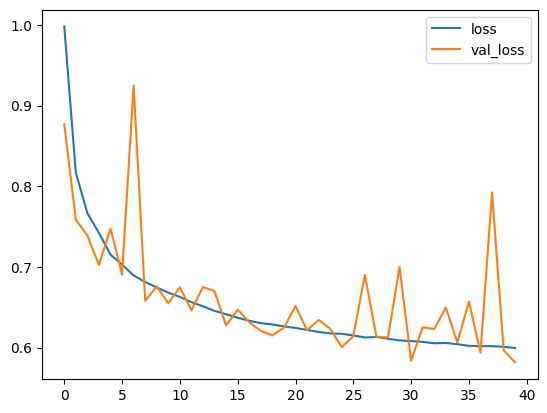

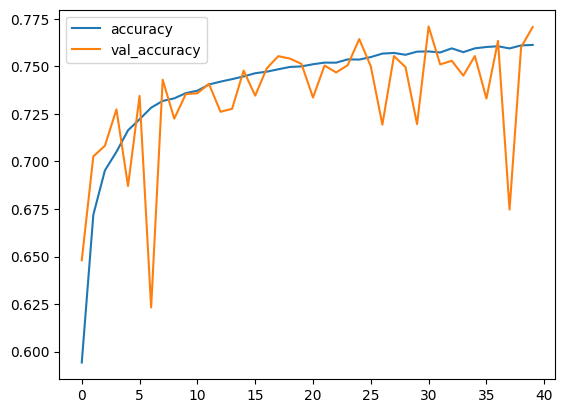

In [79]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

In [80]:
y_pred2=np.round(model.predict(Xsc_test))

1650/1650 [==============================] - 3s 2ms/step


In [81]:
from sklearn.metrics import recall_score
ann_score=recall_score(ysc_test,y_pred2,average='weighted')
ann_score

0.7373167127647482

Text(158.22222222222223, 0.5, 'Prediction')

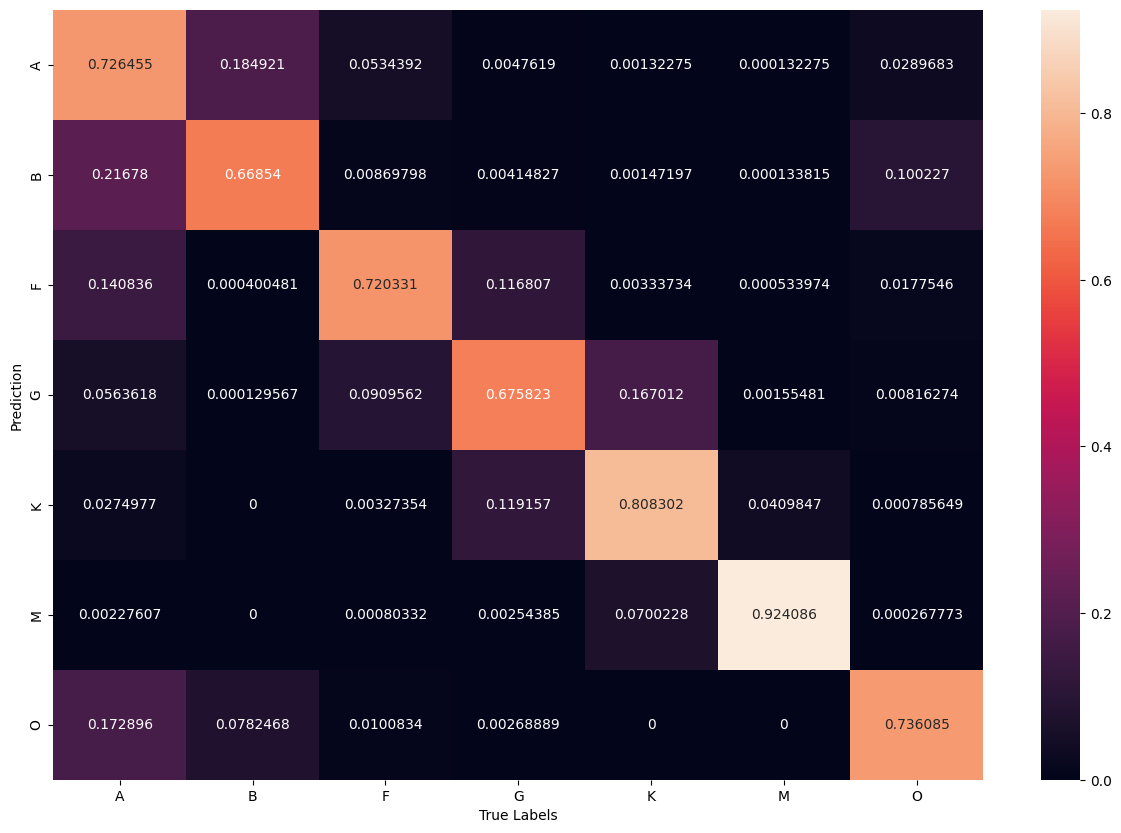

In [82]:
from sklearn.metrics import confusion_matrix

cm_ann=confusion_matrix(ysc_test.argmax(axis=1),y_pred2.argmax(axis=1),normalize='true')

#sns.heatmap(cm_ann,annot=True,fmt='g')
plt.figure(figsize=(15,10))
sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['A','B','F','G','K','M','O'],yticklabels=['A','B','F','G','K','M','O'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

# Temperature estimation using ML algorithms and ANN

## Preparing the data table

In [83]:
new_df=df1
df1

Plx   Vmag   BTmag   VTmag    B-V   V-I    Hpmag SpClass
0        3.54   9.10   9.643   9.130  0.482  0.55   9.2043       F
3        7.75   8.06   8.471   8.092  0.370  0.43   8.1498       F
9       10.76   8.59   9.140   8.630  0.489  0.56   8.6994       F
15       6.15   8.15   8.642   8.187  0.425  0.49   8.2405       F
22      12.21   7.57   8.044   7.606  0.456  0.53   7.6626       F
...       ...    ...     ...     ...    ...   ...      ...     ...
114380   0.48   7.23   7.187   7.220 -0.026  0.00   7.2321       O
114583   2.04   8.69   9.426   8.836  0.630  0.70   8.8228       O
115322   1.54  10.80  11.624  10.802  0.750  0.79  10.9373       O
116125   2.57  10.94  11.564  11.016  0.728  0.78  11.0972       O
118008   0.86   8.72   9.597   8.833  0.681  0.74   8.8661       O

[108486 rows x 8 columns]

In [84]:
temp= 4600 * (1/(0.92 * new_df['B-V'] + 1.7) + 1/(0.92 * new_df['B-V'] + 0.62))
temp

0          6471.667826
3          7044.130880
9          6439.201919
15         6749.854896
22         6595.421996
              ...     
114380    10461.584024
114583     5852.509414
115322     5436.136574
116125     5507.679858
118008     5667.475723
Name: B-V, Length: 108486, dtype: float64

In [85]:
data_temp=temp.to_numpy()

In [86]:
data_temp

array([6471.66782641, 7044.13088025, 6439.2019191 , ..., 5436.13657415,
       5507.67985763, 5667.47572331])

In [87]:
temp_list=data_temp
new_df.loc[:, "Temperature"] = data_temp
new_df

Plx   Vmag   BTmag   VTmag    B-V   V-I    Hpmag SpClass  \
0        3.54   9.10   9.643   9.130  0.482  0.55   9.2043       F   
3        7.75   8.06   8.471   8.092  0.370  0.43   8.1498       F   
9       10.76   8.59   9.140   8.630  0.489  0.56   8.6994       F   
15       6.15   8.15   8.642   8.187  0.425  0.49   8.2405       F   
22      12.21   7.57   8.044   7.606  0.456  0.53   7.6626       F   
...       ...    ...     ...     ...    ...   ...      ...     ...   
114380   0.48   7.23   7.187   7.220 -0.026  0.00   7.2321       O   
114583   2.04   8.69   9.426   8.836  0.630  0.70   8.8228       O   
115322   1.54  10.80  11.624  10.802  0.750  0.79  10.9373       O   
116125   2.57  10.94  11.564  11.016  0.728  0.78  11.0972       O   
118008   0.86   8.72   9.597   8.833  0.681  0.74   8.8661       O   

         Temperature  
0        6471.667826  
3        7044.130880  
9        6439.201919  
15       6749.854896  
22       6595.421996  
...              ...  
114380  10461.584024  
114583   5852.509414  
115322   5436.136574  
116125   5507.679858  
118008   5667.475723  

[108486 rows x 9 columns]

## Visualizing the Temperature

Text(0, 0.5, 'Counts')

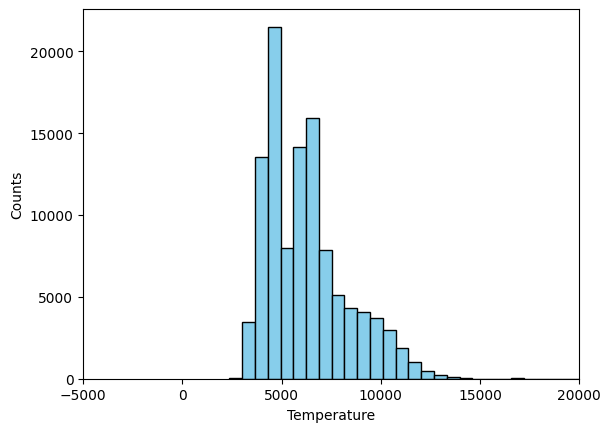

In [88]:
plt.hist(data_temp, bins=30, color='skyblue', edgecolor='black')
plt.xlim(-5000,20000)
plt.xlabel('Temperature')
plt.ylabel('Counts')

## Using ML for estimating Temperature

### Understanding the correlation

<Axes: >

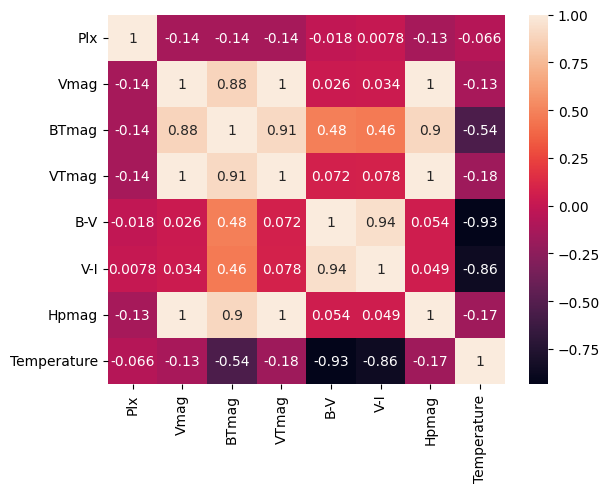

In [89]:
sns.heatmap(new_df.corr(),annot = True)

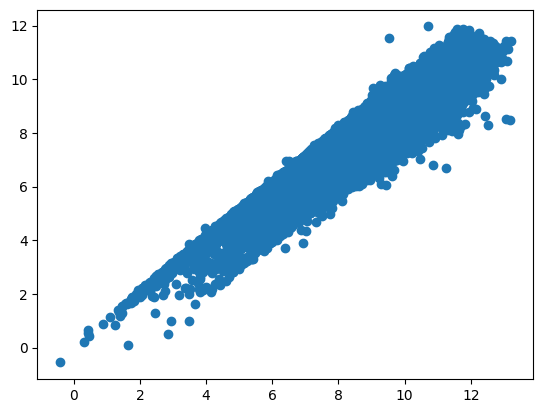

In [90]:
plt.scatter(new_df['BTmag'],new_df['Hpmag'])

### Feature Engineering

In [91]:
X=new_df.drop(['SpClass','Temperature'],axis=1)
Y=new_df['Temperature']

### Splitting into training and testing dataset

In [92]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, yt_train, yt_test= train_test_split(X,Y,test_size=0.25,random_state=210)

In [93]:
Xt_train.shape

(81364, 7)

Text(0, 0.5, 'counts')

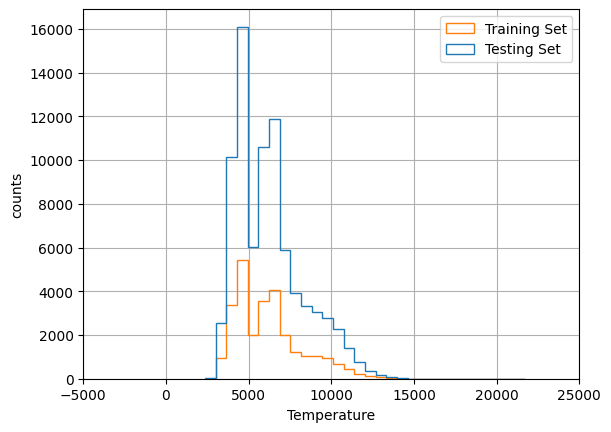

In [94]:
plt.hist([yt_train,yt_test],histtype='step',bins=30,align='mid')
plt.xlim(-5000,25000)
plt.grid()
plt.legend(['Training Set','Testing Set'])
plt.xlabel('Temperature')
plt.ylabel('counts')

### The ML Models

#### 1. Linear Regression

In [95]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xt_train_norm = ss.fit_transform(Xt_train)
Xt_test_norm = ss.transform(Xt_test)
print(Xt_train_norm)
#print(Xt_test_norm)

[[ 0.15528187  0.21766465  0.00893802 ... -0.3339683  -0.25535447
   0.20404207]
 [ 0.82918024 -0.44986736 -0.62751295 ... -0.46255502 -0.36786093
  -0.44372247]
 [ 0.62758671  0.4429567   0.40303671 ...  0.11292326  0.10091598
   0.47366827]
 ...
 [ 0.02280612 -0.69184772 -1.0275047  ... -0.90312264 -0.83663784
  -0.7113637 ]
 [-0.42876339 -0.22457531 -0.81609101 ... -1.39006579 -1.30541475
  -0.29708221]
 [ 0.09077194 -0.85038657 -0.47208337 ...  0.6314861   0.43843535
  -0.79671776]]


In [96]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(Xt_train_norm,yt_train)

y_pred_temp_LR=model.predict(Xt_test_norm)


In [97]:
y_pred_temp_LR

array([3751.61142948, 5781.28620218, 3737.93307792, ..., 6520.08094637,
       8535.73737319, 8432.07685642])

In [98]:
from sklearn.metrics import explained_variance_score
explained_variance_score(yt_test,y_pred_temp_LR)

0.9457846098409779

Now, lets take the mean temperature

In [99]:
# Testing set
T_test_mean=np.mean(yt_test)
T_pred_LR_mean=np.mean(y_pred_temp_LR)

In [100]:
T_test_mean

6225.55269982143

In [101]:
T_pred_LR_mean

6226.245171619706

In [102]:
yt_test

28421     4436.177624
47958     5709.878386
54882     3945.489628
44240     6869.609713
47847     9349.174503
             ...     
15546     6443.818339
105445    5663.972551
47230     6357.311055
70311     8257.054701
46362     8109.225077
Name: Temperature, Length: 27122, dtype: float64

Text(0, 0.5, 'Counts')

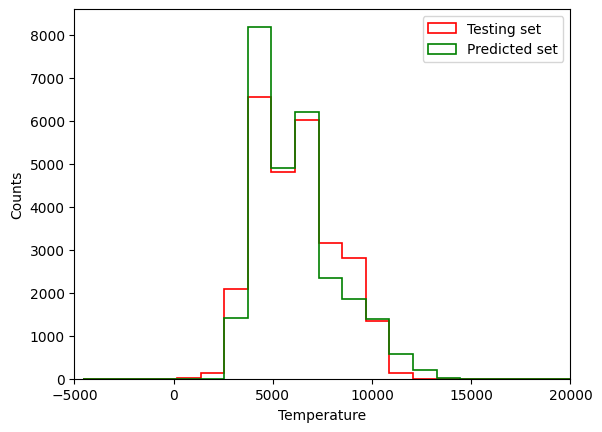

In [103]:
colors=['green','red']
plt.hist([yt_test,y_pred_temp_LR],histtype='step',lw=1.2,color=colors ,bins=30)
plt.xlim(-5000,20000)
plt.legend(['Testing set','Predicted set'])
plt.xlabel('Temperature')
plt.ylabel('Counts')

#### 2. Artificial Neural Network

In [104]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xt_train_norm = ss.fit_transform(Xt_train)
Xt_test_norm = ss.transform(Xt_test)
print(Xt_train_norm)
#print(Xt_test_norm)

[[ 0.15528187  0.21766465  0.00893802 ... -0.3339683  -0.25535447
   0.20404207]
 [ 0.82918024 -0.44986736 -0.62751295 ... -0.46255502 -0.36786093
  -0.44372247]
 [ 0.62758671  0.4429567   0.40303671 ...  0.11292326  0.10091598
   0.47366827]
 ...
 [ 0.02280612 -0.69184772 -1.0275047  ... -0.90312264 -0.83663784
  -0.7113637 ]
 [-0.42876339 -0.22457531 -0.81609101 ... -1.39006579 -1.30541475
  -0.29708221]
 [ 0.09077194 -0.85038657 -0.47208337 ...  0.6314861   0.43843535
  -0.79671776]]


In [105]:
#from sklearn.neural_network import MLPRegressor
#model= MLPRegressor(activation='relu', hidden_layer_sizes=(25, 25, 25, 25), learning_rate='adaptive', max_iter=1000, solver='sgd',verbose=False)


In [106]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#Xt_train_norm = scaler.fit_transform(Xt_train)
#Xt_test_norm= scaler.fit_transform(Xt_test)

#scaler = StandardScaler().fit(Xt_train)
#X_train_norm = scaler.transform(Xt_train)
#X_test_norm = scaler.transform(Xt_test)

In [107]:
#model.fit(Xt_train_norm, yt_train)  # perform training


In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [109]:
ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=25, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=25, activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=25, activation="relu")) # Third hidden layer
ann.add(Dense(units=25, activation="relu")) #Fourth hidden layer
ann.add(Dense(units=1))   # Adding Output Layer
#If we make a regression with neural networks, we do not need to add an activation function compared to classification problem

In [110]:
ann.compile(optimizer="adam",loss="mean_squared_error")

In [111]:
#ann.fit(x=Xt_train_norm, y=yt_train, epochs=100, batch_size=32,validation_data=(Xt_test_norm,yt_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))
ann.fit(x=Xt_train_norm, y=yt_train, epochs=100, batch_size=32,validation_data=(Xt_test_norm,yt_test))

Epoch 1/100
2543/2543 [==============================] - 13s 4ms/step - loss: 4079866.5000 - val_loss: 128300.2656
Epoch 2/100
2543/2543 [==============================] - 11s 4ms/step - loss: 96814.7344 - val_loss: 62058.6719
Epoch 3/100
2543/2543 [==============================] - 10s 4ms/step - loss: 54679.4141 - val_loss: 34818.8438
Epoch 4/100
2543/2543 [==============================] - 10s 4ms/step - loss: 35031.0117 - val_loss: 22641.9434
Epoch 5/100
2543/2543 [==============================] - 10s 4ms/step - loss: 24335.4102 - val_loss: 15039.8574
Epoch 6/100
2543/2543 [==============================] - 10s 4ms/step - loss: 17142.1348 - val_loss: 9632.6523
Epoch 7/100
2543/2543 [==============================] - 12s 5ms/step - loss: 11944.5244 - val_loss: 6504.5601
Epoch 8/100
2543/2543 [==============================] - 10s 4ms/step - loss: 8497.4131 - val_loss: 5821.8013
Epoch 9/100
2543/2543 [==============================] - 11s 5ms/step - loss: 6521.1768 - val_loss: 4270.

In [112]:
y_pred_temp_ann=ann.predict(Xt_test_norm)

848/848 [==============================] - 1s 2ms/step


In [113]:
y_pred_temp_ann

array([[4421.3086],
       [5717.594 ],
       [3941.5981],
       ...,
       [6368.0303],
       [8274.577 ],
       [8124.7295]], dtype=float32)

In [114]:
from sklearn.metrics import explained_variance_score
explained_variance_score(yt_test,y_pred_temp_ann)

0.9999201464805626

In [115]:
T_test_mean=np.mean(yt_test)
T_pred_ann_mean=np.mean(np.ravel(y_pred_temp_ann))

In [116]:
T_test_mean

6225.55269982143

In [117]:
T_pred_ann_mean

6228.257

In [118]:
yt_train.shape

(81364,)

In [119]:
yt_test

28421     4436.177624
47958     5709.878386
54882     3945.489628
44240     6869.609713
47847     9349.174503
             ...     
15546     6443.818339
105445    5663.972551
47230     6357.311055
70311     8257.054701
46362     8109.225077
Name: Temperature, Length: 27122, dtype: float64

In [120]:
y_pred_temp_ann.shape

(27122, 1)

In [121]:
prediction=np.ravel(y_pred_temp_ann)
prediction

array([4421.3086, 5717.594 , 3941.5981, ..., 6368.0303, 8274.577 ,
       8124.7295], dtype=float32)

In [122]:
yt_test

28421     4436.177624
47958     5709.878386
54882     3945.489628
44240     6869.609713
47847     9349.174503
             ...     
15546     6443.818339
105445    5663.972551
47230     6357.311055
70311     8257.054701
46362     8109.225077
Name: Temperature, Length: 27122, dtype: float64

Text(0, 0.5, 'Counts')

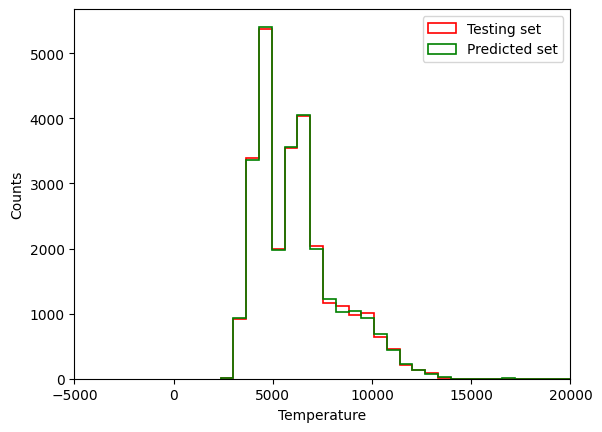

In [123]:
colors=['green','red']
plt.hist([yt_test,prediction],histtype='step',lw=1.2,color=colors ,bins=30)
plt.xlim(-5000,20000)
plt.legend(['Testing set','Predicted set'])
plt.xlabel('Temperature')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

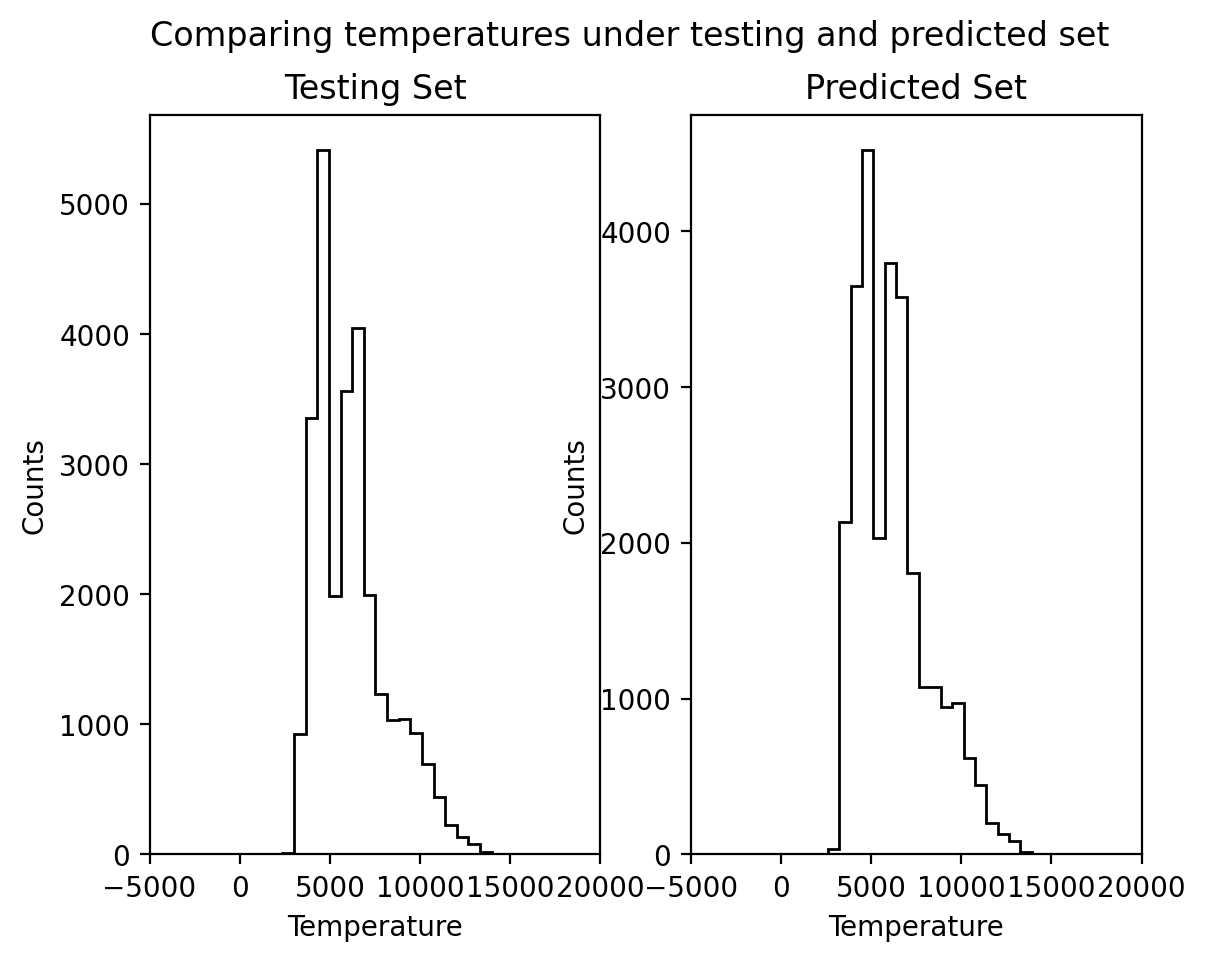

In [124]:
plt.figure(dpi=200)
plt.suptitle('Comparing temperatures under testing and predicted set')
plt.subplot(121)
plt.title('Testing Set')
plt.hist(yt_test, bins=30,histtype='step', color='skyblue', edgecolor='black')
plt.xlim(-5000,20000)
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.subplot(122)
plt.title('Predicted Set')
plt.hist(y_pred_temp_ann,histtype='step', bins=30, color='skyblue', edgecolor='black')
plt.xlim(-5000,20000)
plt.xlabel('Temperature')
plt.ylabel('Counts')

# Predicting on the whole dataset

In [125]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_norm = ss.fit_transform(X)
#Xt_test_norm = ss.transform(Xt_test)
print(X_norm)

[[-0.40607166  0.7248094   0.40375323 ... -0.43407754 -0.35240509
   0.71794068]
 [ 0.08009974 -0.14277854 -0.45976005 ... -0.67006873 -0.57783225
  -0.15407312]
 [ 0.42769497  0.29935762  0.03314983 ... -0.4193281  -0.33361949
   0.30041601]
 ...
 [-0.63703194  2.142982    1.86332644 ...  0.13061564  0.09844923
   2.15103686]
 [-0.5180874   2.25977268  1.81911928 ...  0.08426023  0.07966363
   2.28326541]
 [-0.71555844  0.40780611  0.36986107 ... -0.01477178  0.00452125
   0.43826779]]


In [126]:
LR_pred=model.predict(X_norm)
ann_pred=ann.predict(X_norm)

3391/3391 [==============================] - 6s 2ms/step


In [ ]:
plt.figure(dpi=200)
colors=['green','red','blue']
#plt.hist([Y,LR_pred,np.ravel(ann_pred)],histtype='step',color=colors,lw=1.2,bins=30,align='mid')
plt.hist([Y,LR_pred],histtype='step',lw=1.2,bins=100,align='mid')
plt.xlim(-5000,20000)
plt.grid()
plt.legend(['Actual set','Logistic Regression Predicted set','ANN Predicted set'])
plt.xlabel('Temperature')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

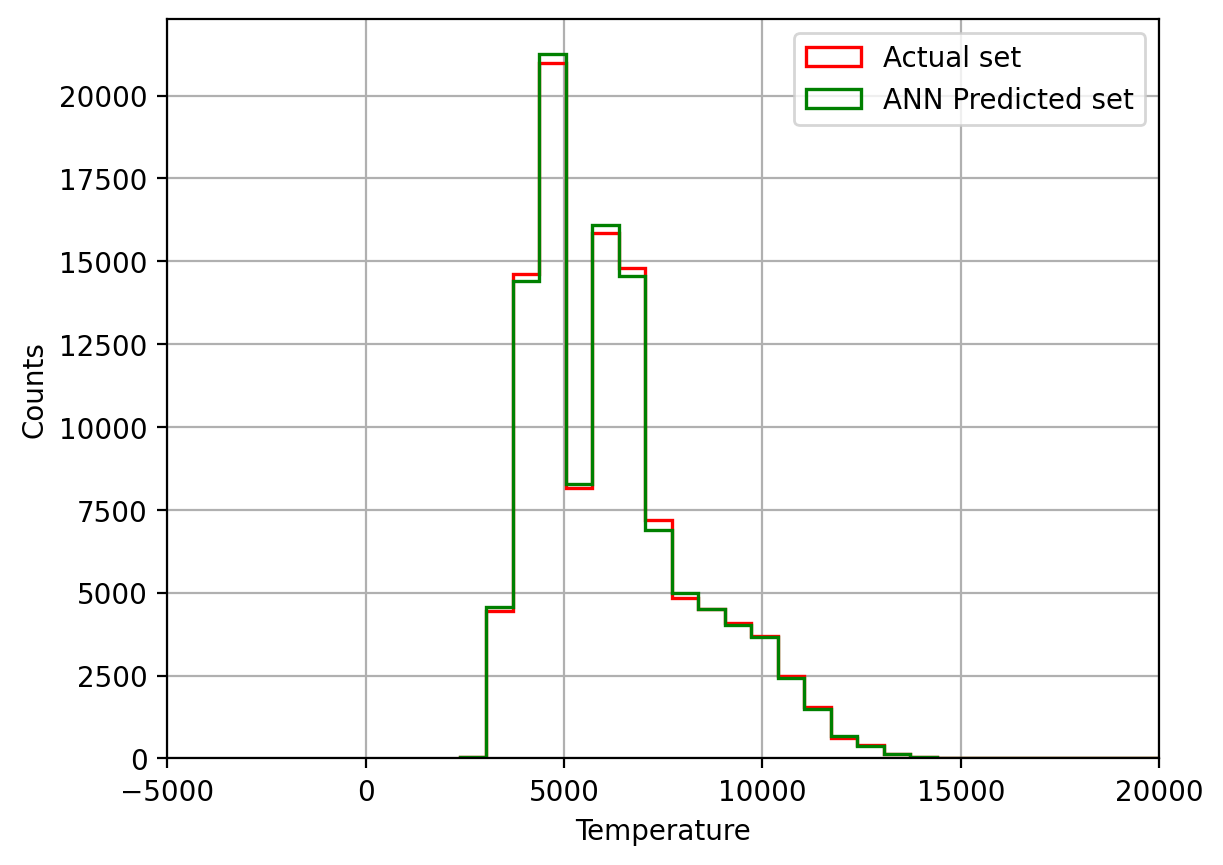

In [128]:
plt.figure(dpi=200)
colors=['green','red']
plt.hist([Y,np.ravel(ann_pred)],histtype='step',color=colors,lw=1.2,bins=30,align='mid')
plt.xlim(-5000,20000)
plt.grid()
plt.legend(['Actual set','ANN Predicted set'])
plt.xlabel('Temperature')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

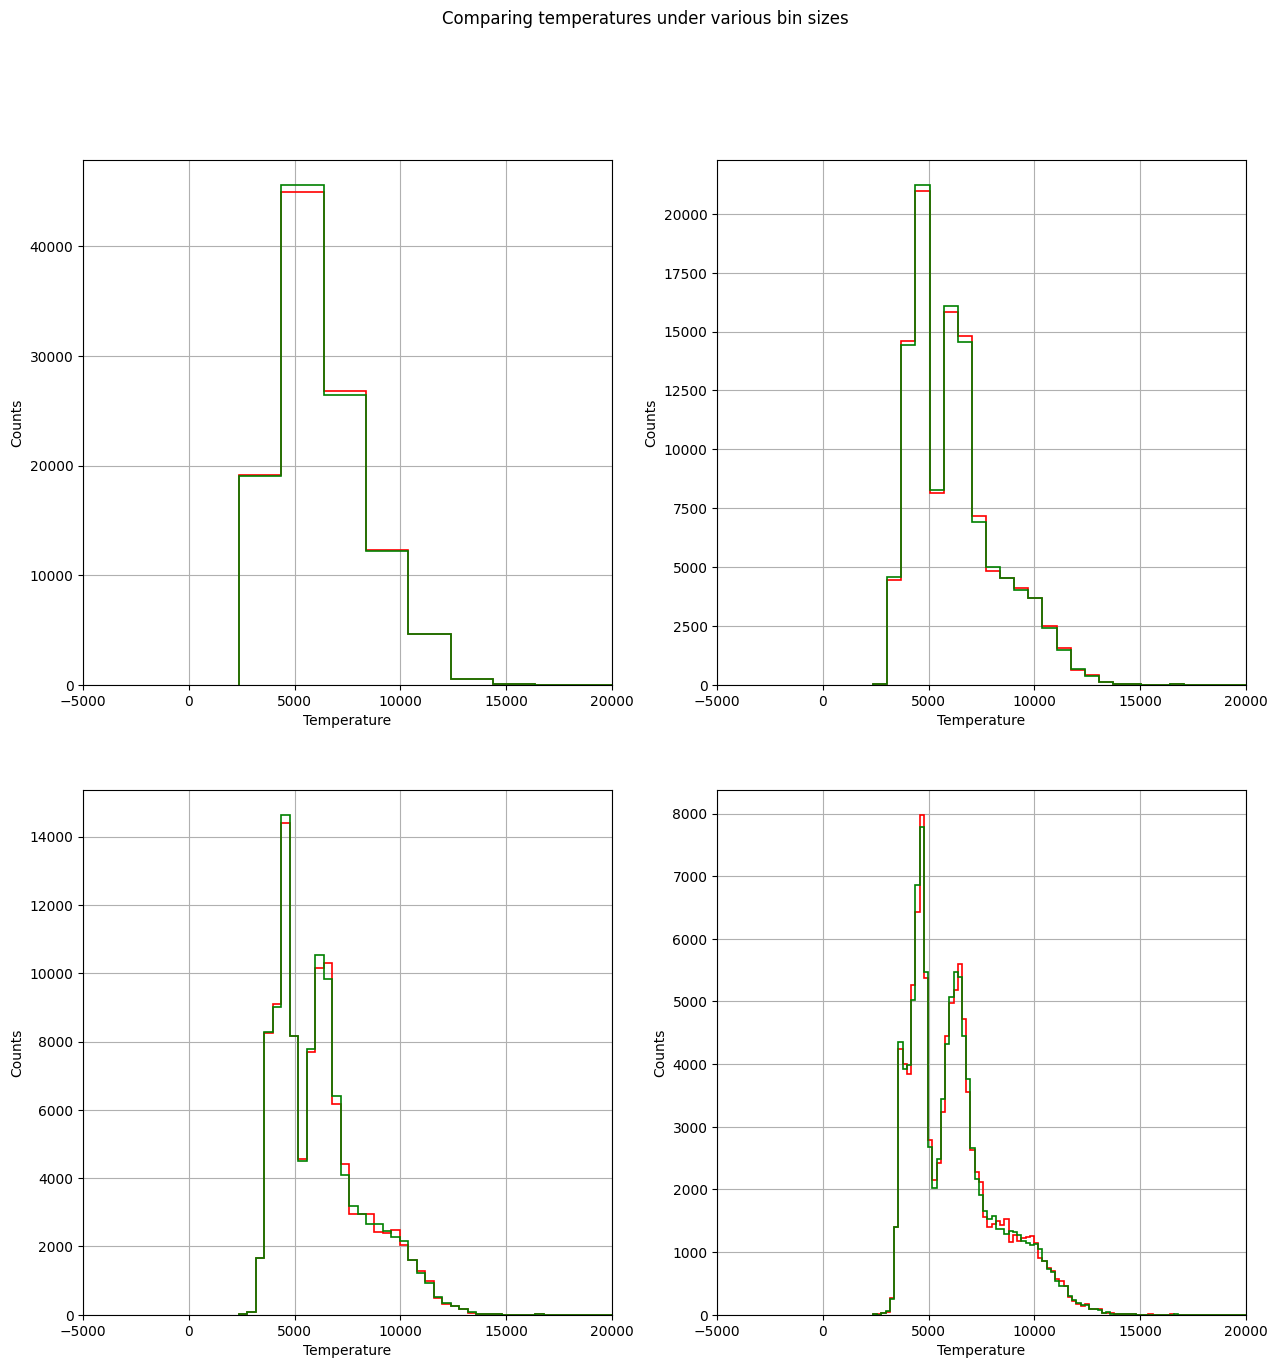

In [129]:
colors=['green','red']
plt.figure(figsize=(15,15))
plt.suptitle('Comparing temperatures under various bin sizes')
plt.subplot(221)
#plt.title('Testing Set')
plt.grid()
plt.hist([Y,np.ravel(ann_pred)],histtype='step',color=colors,lw=1.2,bins=10,align='mid')
plt.xlim(-5000,20000)
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.subplot(222)
plt.grid()
#plt.title('Predicted Set')
plt.hist([Y,np.ravel(ann_pred)],histtype='step',color=colors,lw=1.2,bins=30,align='mid')
plt.xlim(-5000,20000)
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.subplot(223)
plt.grid()
plt.hist([Y,np.ravel(ann_pred)],histtype='step',color=colors,lw=1.2,bins=50,align='mid')
plt.xlim(-5000,20000)
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.subplot(224)
plt.grid()
plt.hist([Y,np.ravel(ann_pred)],histtype='step',color=colors,lw=1.2,bins=100,align='mid')
plt.xlim(-5000,20000)
plt.xlabel('Temperature')
plt.ylabel('Counts')